In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Precipitación\XV Región\MatrizPPXV.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

         ID_CIDERH REGION   FECHA_RBE  PP_RBE     LAT_Y      LON_X
0       M_001_A_XV     XV  1982-01-01     0.0 -18.83571 -69.745881
1       M_001_A_XV     XV  1982-01-02     0.0 -18.83571 -69.745881
2       M_001_A_XV     XV  1982-01-03     0.0 -18.83571 -69.745881
3       M_001_A_XV     XV  1982-01-04     0.0 -18.83571 -69.745881
4       M_001_A_XV     XV  1982-01-05     0.0 -18.83571 -69.745881
...            ...    ...         ...     ...       ...        ...
240946    M_201_AA     XV  2006-06-05     0.0 -18.46700 -70.167000
240947    M_201_AA     XV  2006-06-22     0.0 -18.46700 -70.167000
240948    M_201_AA     XV  2006-09-28     0.0 -18.46700 -70.167000
240949    M_201_AA     XV  2006-10-04     0.0 -18.46700 -70.167000
240950    M_202_AA     XV  2006-05-27     0.0 -18.47000 -70.170000

[240951 rows x 6 columns]


ID_CIDERH   M_029_A_XV  M_030_A_XV  M_031_A_XV  M_033_A_XV
ID_CIDERH                                                 
M_029_A_XV    1.000000    0.615027    0.586034    0.556242
M_030_A_XV    0.615027    1.000000    0.703077    0.675210
M_031_A_XV    0.586034    0.703077    1.000000    0.652319
M_033_A_XV    0.556242    0.675210    0.652319    1.000000


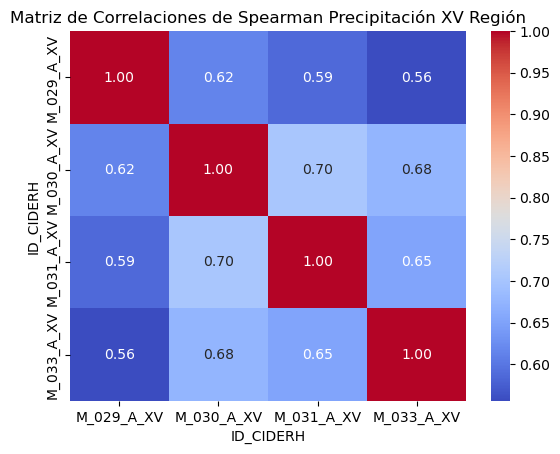

Cantidad de datos de TEMP_MIN_RBE por estación:
ID_CIDERH
M_029_A_XV    9378
M_030_A_XV    9650
M_031_A_XV    9769
M_033_A_XV    9663
Name: PP_RBE, dtype: int64


In [2]:
# Lista de estaciones específicas
estaciones_especificas = ['M_029_A_XV', 'M_030_A_XV', 'M_031_A_XV', 'M_033_A_XV']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='PP_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman Precipitación XV Región')
plt.show()

# Contar la cantidad de datos de TEMP_MIN_RBE para cada estación seleccionada
cantidad_datos_temp_min_por_estacion = datos_especificos.groupby('ID_CIDERH')['PP_RBE'].count()

# Mostrar la cantidad de datos para cada estación
print("Cantidad de datos de TEMP_MIN_RBE por estación:")
print(cantidad_datos_temp_min_por_estacion)

In [1]:
import pandas as pd
from scipy.stats import anderson
import numpy as np

def anderson_darling_p_value(statistic):
    """Calcula el valor p aproximado para el estadístico de Anderson-Darling."""
    if statistic < 0.2:
        return 1 - np.exp(-13.436 + 101.14 * statistic - 223.73 * statistic**2)
    elif statistic < 0.34:
        return 1 - np.exp(-8.318 + 42.796 * statistic - 59.938 * statistic**2)
    elif statistic < 0.6:
        return np.exp(0.9177 - 4.279 * statistic - 1.38 * statistic**2)
    elif statistic < 10:
        return np.exp(1.2937 - 5.709 * statistic + 0.0186 * statistic**2)
    else:
        return np.exp(1.2937 - 5.709 * 10 + 0.0186 * 10**2)

# Cargar el archivo CSV
archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Precipitación\XV Región\MatrizPPXV.csv"
df = pd.read_csv(archivo_csv)

# Obtener la lista de estaciones únicas
estaciones = df['ID_CIDERH'].unique()

# Lista de estaciones específicas
estaciones_especificas = ['M_029_A_XV', 'M_030_A_XV', 'M_031_A_XV', 'M_033_A_XV']

# Nivel de significancia para la prueba de Anderson-Darling
significance_level = 0.05

# Iterar sobre cada estación
for estacion_id in estaciones_especificas:
    # Filtrar los datos para la estación ID_CIDERH específica
    estacion_data = df[df['ID_CIDERH'] == estacion_id]

    # Seleccionar la variable de interés (TEMP_MIN_RBE)
    temp_min_data = estacion_data['PP_RBE']

    # Eliminar valores NaN si es necesario
    temp_min_data = temp_min_data.dropna()

    # Calcular la prueba de Anderson-Darling
    result = anderson(temp_min_data, dist='norm')

    print("Resultados de la prueba de Anderson-Darling para la estación", estacion_id)
    print("Estadístico de Anderson-Darling:", result.statistic)

    # Calcular el valor p aproximado
    p_value = anderson_darling_p_value(result.statistic)
    print("Valor p aproximado: {:.2e}".format(p_value))

    # Evaluar si se rechaza la hipótesis nula al nivel de significancia dado
    if p_value < significance_level:
        print(f"La hipótesis nula se rechaza al nivel de significancia {significance_level}.")
    else:
        print(f"No se puede rechazar la hipótesis nula al nivel de significancia {significance_level}.")

Resultados de la prueba de Anderson-Darling para la estación M_029_A_XV
Estadístico de Anderson-Darling: 2650.2378887197847
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Anderson-Darling para la estación M_030_A_XV
Estadístico de Anderson-Darling: 2757.7197223223247
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Anderson-Darling para la estación M_031_A_XV
Estadístico de Anderson-Darling: 2691.11615078618
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Anderson-Darling para la estación M_033_A_XV
Estadístico de Anderson-Darling: 2936.0314911864734
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.


In [2]:
import pandas as pd
from scipy.stats import kstest, norm

# Cargar el archivo CSV
archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Precipitación\XV Región\MatrizPPXV.csv"
df = pd.read_csv(archivo_csv)

# Obtener la lista de estaciones únicas
estaciones = df['ID_CIDERH'].unique()

# Lista de estaciones específicas
estaciones_especificas = ['M_029_A_XV', 'M_030_A_XV', 'M_031_A_XV', 'M_033_A_XV']

# Iterar sobre cada estación
for estacion_id in estaciones_especificas:
    # Filtrar los datos para la estación ID_CIDERH específica
    estacion_data = df[df['ID_CIDERH'] == estacion_id]

    # Seleccionar la variable de interés (TEMP_MIN_RBE)
    temp_min_data = estacion_data['PP_RBE']

    # Eliminar valores NaN si es necesario
    temp_min_data = temp_min_data.dropna()

    # Normalizar los datos a una distribución normal estándar
    mean = temp_min_data.mean()
    std = temp_min_data.std()
    standardized_data = (temp_min_data - mean) / std

    # Calcular la prueba de Kolmogorov-Smirnov
    statistic, p_value = kstest(standardized_data, 'norm')

    print("Resultados de la prueba de Kolmogorov-Smirnov para la estación", estacion_id)
    print("Estadístico de prueba:", statistic)
    print("Valor p: {:.2e}".format(p_value))

    # Evaluar si se rechaza la hipótesis nula al nivel de significancia dado
    if p_value < significance_level:
        print(f"La hipótesis nula se rechaza al nivel de significancia {significance_level}.")
    else:
        print(f"No se puede rechazar la hipótesis nula al nivel de significancia {significance_level}.")

Resultados de la prueba de Kolmogorov-Smirnov para la estación M_029_A_XV
Estadístico de prueba: 0.47853600471298363
Valor p: 0.00e+00
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Kolmogorov-Smirnov para la estación M_030_A_XV
Estadístico de prueba: 0.48204637610252543
Valor p: 0.00e+00
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Kolmogorov-Smirnov para la estación M_031_A_XV
Estadístico de prueba: 0.47491403477208527
Valor p: 0.00e+00
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Kolmogorov-Smirnov para la estación M_033_A_XV
Estadístico de prueba: 0.4932979747806691
Valor p: 0.00e+00
La hipótesis nula se rechaza al nivel de significancia 0.05.
